# Simulation notebook
This notebook is used for testing the Nile model on the single run *simulation* (not optimization) mode.

In [1]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
#import pickle

from plotter import HydroModelPlotter
#from plotting_functions import plot_two_lines_together, line_graph_with_limits
from data_generation import generate_input_data

import sys

# my_path = sys.path[0]
# while my_path[-1] != "/" and my_path[-1] != "\\":
#     my_path = my_path[:-1]
# sys.path.insert(1, my_path + "Model")

from model_nile import ModelNile

In [2]:
model = ModelNile()
model_plotter = HydroModelPlotter(model)

In [3]:
model = generate_input_data(model, sim_horizon=20)

In [18]:
#number of parameters
pcount = model.overarching_policy.get_total_parameter_count()

#read the baseline optimization
results = pd.read_csv('baseline_results.csv')
results = results.iloc[ : , 1 :]

#policy parameters 
policy_parameters = results.iloc[:, :164]

#Objective values
objectives = results.iloc[:, 164:]



340

In [35]:
# Time series for objectives, t = 1 month
#time_series_obj = {}
column_names = ['bcm_def_egypt', 'egypt_freq_low_HAD', 'bcm_def_sudan', 'ethiopia_agg_hydro']
#for i in range(policy_parameters.shape[0]):
policy = np.array(policy_parameters.iloc[0, ])


bcm_def_egypt, egypt_freq_low_HAD, bcm_def_sudan, ethiopia_agg_hydro = model.time_series_obj(policy)

In [44]:
print(len(bcm_def_sudan))

240


In [28]:
column_names = ['bcm_def_egypt', 'egypt_freq_low_HAD', 'bcm_def_sudan', 'ethiopia_agg_hydro']
time_series_set = np.hstack((bcm_def_egypt, bcm_def_sudan, ethiopia_agg_hydro))
#time_series_dataframe = pd.DataFrame(time_series_set, columns = column_names)
print(time_series_set)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 240 and the array at index 1 has size 1

In [12]:
print(ethiopia_agg_hydro)

[0.13865149 0.09147851 0.07287695 0.03755428 0.08904897 0.37016359
 1.61789026 2.4483552  2.36860184 1.39505063 0.49996226 0.35554291
 0.11659895 0.07502438 0.08531577 0.06423536 0.09964386 0.40335611
 1.59597061 2.45198596 2.3681423  1.772456   0.60171827 0.22945943
 0.17075213 0.07494592 0.05580023 0.08172892 0.12998726 0.34185354
 1.66760574 2.44637261 2.36799153 1.35106584 0.66816308 0.30023215
 0.20195559 0.06514095 0.08488659 0.06192009 0.08855898 0.44376866
 1.56237772 2.4480858  2.3695642  1.0764637  0.645413   0.25682167
 0.19088634 0.07841654 0.04016395 0.07273537 0.12069809 0.27118176
 1.17790258 2.44645024 1.96508855 1.69338364 0.58616056 0.30311305
 0.17024433 0.08924112 0.03956805 0.08135009 0.13061502 0.26480266
 1.77600253 2.44998686 2.07761413 1.84507449 0.43919922 0.28525926
 0.11290069 0.09781565 0.06082362 0.05228338 0.10225902 0.4293404
 1.43749467 2.45500846 2.21993087 1.07383927 0.46624085 0.30957333
 0.14035602 0.06094974 0.03677202 0.03460191 0.13027456 0.44610

In [10]:
#release values

releases = {}
for reservoir in model.reservoirs.keys():
    releases[str(reservoir)] = model.reservoirs[reservoir].release_vector
   

In [64]:
releases.keys()

dict_keys(['GERD', 'Roseires', 'Sennar', 'HAD'])

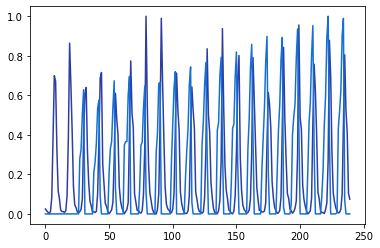

In [14]:
#plot
import matplotlib.pyplot as plt

#naive normalization

release_GERD_norm = (releases['GERD'] - np.min(releases['GERD'])) / (np.max(releases['GERD']) - np.min(releases['GERD']))
ethipia_hydro_norm = (ethiopia_agg_hydro - np.min(ethiopia_agg_hydro)) / (np.max(ethiopia_agg_hydro) - np.min(ethiopia_agg_hydro))
bcm_def_egypt = (bcm_def_egypt - np.min(bcm_def_egypt)) / (np.max(bcm_def_egypt) - np.min(bcm_def_egypt))
plt.plot(release_GERD_norm)
plt.plot(bcm_def_egypt)

plt.show()

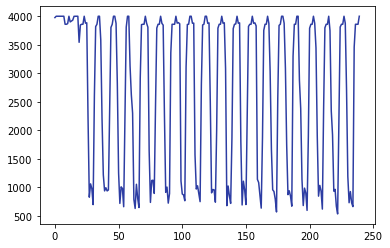

In [67]:
plt.plot(releases['HAD'])
plt.show()

In [26]:
model.reservoirs['GERD'].release_vector

array([ 246.11490285,  179.79394683,  129.38038669,   68.89852798,
        158.08488649,  678.6058325 , 2862.66780495, 5188.93264376,
       4979.38756077, 2469.88849867,  916.35517806,  630.82751864,
        206.98417674,  147.4602479 ,  151.45909745,  117.84163859,
        176.88970943,  739.40122147, 2824.02304203, 6396.49143336,
       4852.51434813, 3135.48686649, 1102.62842234,  407.23641743,
        303.07775138,  147.30658631,   99.06724549,  149.92788472,
        230.74078705,  626.74769637, 2950.31051951, 4531.20706828,
       4752.67621378, 2392.22832319, 1224.17383557,  532.76107489,
        358.43941481,  128.03814681,  150.69721119,  113.59479717,
        157.21540888,  813.40755233, 2764.78924999, 5096.74060262,
       5307.82533715, 1907.18210263, 1182.53439037,  455.77220874,
        338.80066995,  154.12698272,   71.30918443,  133.43223487,
        214.25581719,  497.25867165, 2086.1426007 , 4535.63469829,
       3590.10317348, 2996.00991686, 1074.15348194,  537.86709

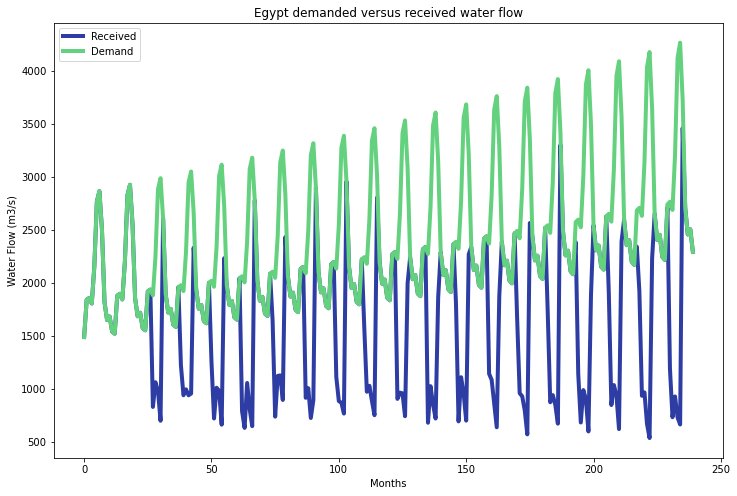

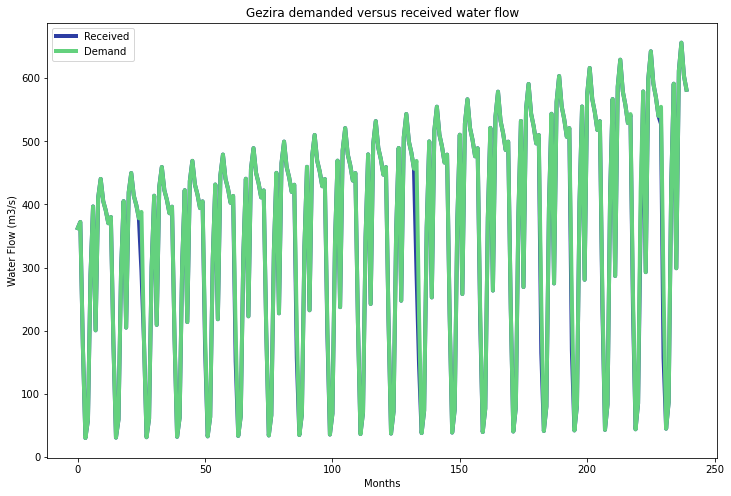

AttributeError: 'HydroModelPlotter' object has no attribute 'plot_levels_condensed'

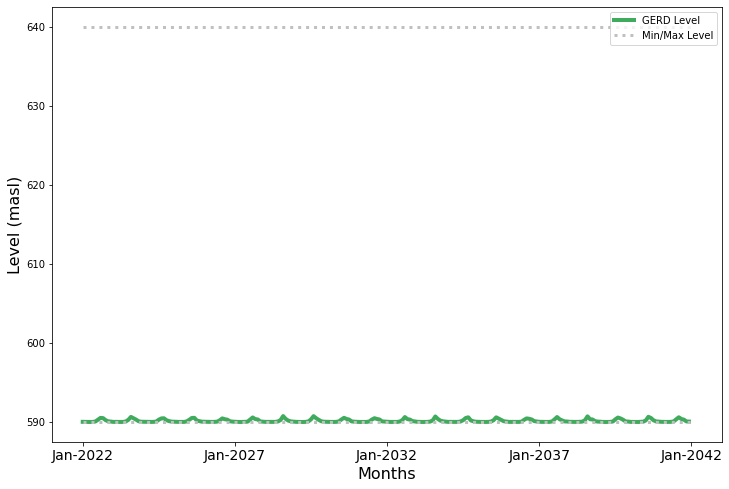

In [5]:
trial_policies = [random_policy, zero_policy]

for policy in trial_policies:
    model.evaluate(policy)
    model_plotter.plot_received_vs_demand_for_district("Egypt")
    model_plotter.plot_received_vs_demand_for_district("Gezira")

    for dam in model.reservoir_names:
        model_plotter.plot_level_with_limits(dam)
        model_plotter.plot_levels_condensed(dam)

# Plotting

Below code block will be used to plot some of the actual physical quantities (summary releases across reservoirs, irrigation per catchment, average environmental flows) based on the vectors that were produced by simulation runs:

In [1]:
import sklearn